<a href="https://colab.research.google.com/github/Aa-sheesh/Aa-sheesh/blob/master/basic_lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 119M/119M [00:06<00:00, 19.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1
Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


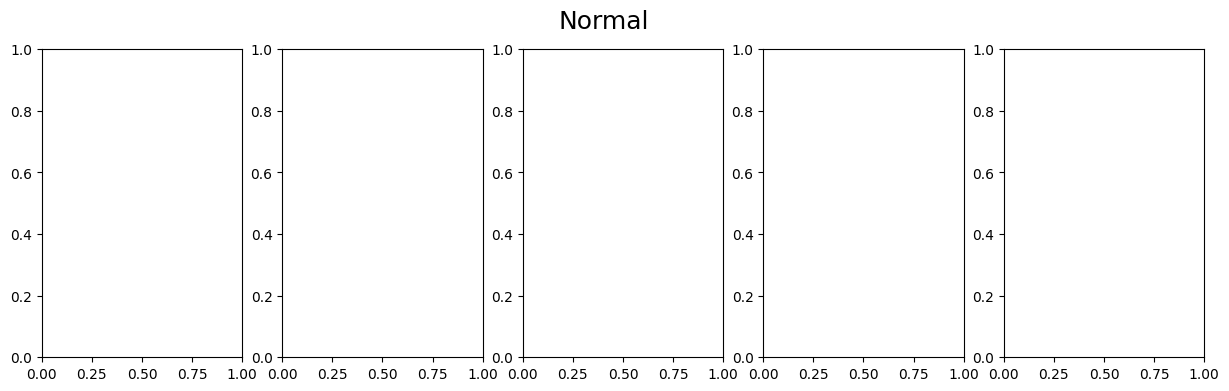

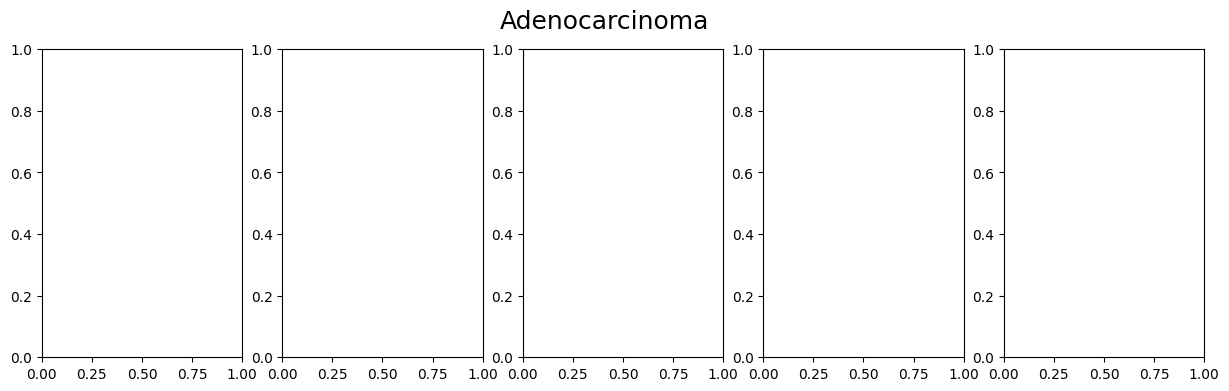

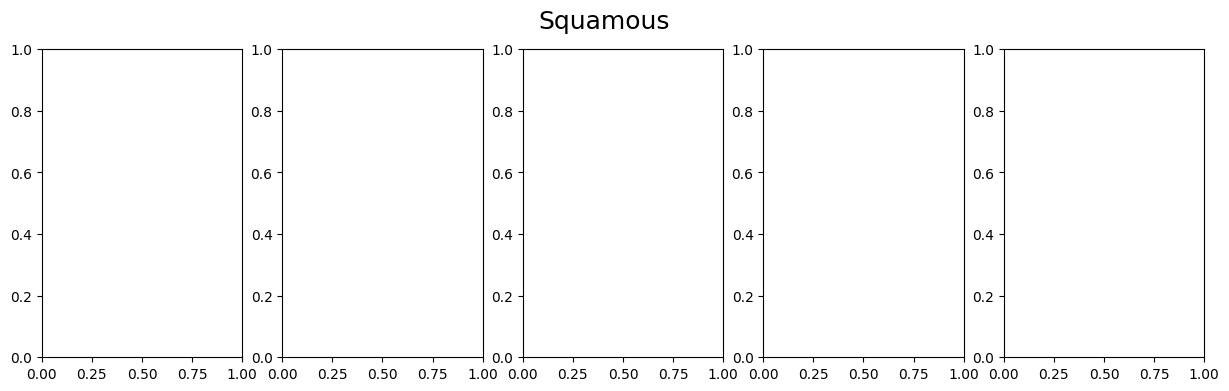

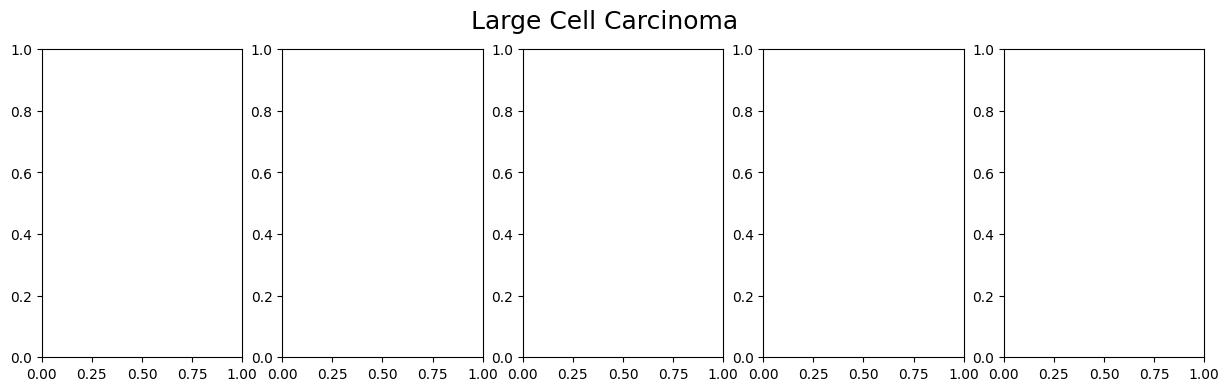

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,122,500 (92.02 MB)

 Trainable params: 15,506,180 (59.15 MB)

 Non-trainable params: 8,616,320 (32.87 MB)

Epoch 1/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - acc: 0.2573 - loss: 2.3281 - val_acc: 0.2083 - val_loss: 1.8143
Epoch 2/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - acc: 0.3018 - loss: 2.2095 - val_acc: 0.1944 - val_loss: 1.7332
Epoch 3/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - acc: 0.2626 - loss: 2.1232 - val_acc: 0.1111 - val_loss: 1.7902
Epoch 4/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - acc: 0.3213 - loss: 1.9365 - val_acc: 0.1667 - val_loss: 1.7450
Epoch 5/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - acc: 0.2356 - loss: 2.1854 - val_acc: 0.0972 - val_loss: 1.7167
Epoch 6/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - acc: 0.2998 - loss: 2.1189 - val_acc: 0.1667 - val_loss: 1.7509
Epoch 7/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.2658 - loss: 2.1175 - val_acc: 0.1944 - val_loss: 1.7966
Epoch 8/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - acc: 0.2461 - loss: 2.2673 - val_acc: 0.1528 - val_loss: 1.8105
Epoch 9/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 0.2408 - loss: 2.2607 - v

Model saved as lung_cancer_model.h5


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("mohamedhanyyy/chest-ctscan-images")
print("Path to dataset files:", path)

import random, shutil, glob, warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot
from matplotlib.image import imread

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, BatchNormalization
from keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, ResNet50
from sklearn import metrics

# Define directories
train_data = os.path.join(path, 'Data/train')
test_data = os.path.join(path, 'Data/test')
validation_data = os.path.join(path, 'Data/valid')

# Data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    dtype='float32',
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
)
test_datagen = ImageDataGenerator(
    dtype='float32',
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
)
validation_datagen = ImageDataGenerator(
    dtype='float32',
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(224, 224),
    batch_size=200,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)

# Optionally display sample images from each class
train_normal = glob.glob(os.path.join(train_data, 'Normal/*'))
train_adenocarcinoma = glob.glob(os.path.join(train_data, 'Adenocarcinoma/*'))
train_squamous = glob.glob(os.path.join(train_data, 'Squamous/*'))
train_large_cell_carcinoma = glob.glob(os.path.join(train_data, 'Large cell carcinoma/*'))

fig1, ax1 = plt.subplots(1, 5, figsize=(15, 4))
fig1.suptitle("Normal", fontsize=18)
for i in range(min(5, len(train_normal))):
    ax1[i].imshow(imread(train_normal[i]))

fig1, ax1 = plt.subplots(1, 5, figsize=(15, 4))
fig1.suptitle("Adenocarcinoma", fontsize=18)
for i in range(min(5, len(train_adenocarcinoma))):
    ax1[i].imshow(imread(train_adenocarcinoma[i]))

fig1, ax1 = plt.subplots(1, 5, figsize=(15, 4))
fig1.suptitle("Squamous", fontsize=18)
for i in range(min(5, len(train_squamous))):
    ax1[i].imshow(imread(train_squamous[i]))

fig1, ax1 = plt.subplots(1, 5, figsize=(15, 4))
fig1.suptitle("Large Cell Carcinoma", fontsize=18)
for i in range(min(5, len(train_large_cell_carcinoma))):
    ax1[i].imshow(imread(train_large_cell_carcinoma[i]))

plt.show()

# ---------------------------
# Model Construction & Training
# ---------------------------
image_shape = (224, 224, 3)
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape=image_shape)

# Freeze all layers except those in the conv5 block
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

resnet_model = Sequential()
resnet_model.add(res_model)
resnet_model.add(Dropout(0.3))
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(4, activation='softmax'))

optimizer = optimizers.SGD(learning_rate=0.00003)
resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
resnet_model.summary()

history_res = resnet_model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=70,
    verbose=1,
    validation_data=validation_generator
)

# ---------------------------
# Save the trained model for deployment
# ---------------------------
resnet_model.save('lung_cancer_model.h5')
print("Model saved as lung_cancer_model.h5")
